- 이미지를 분류할 때 이미 잘 학습되어 있는 모델을 사용한다는 아이디어를 떠올릴 수 있습니다.
- 사전학습 모델인 Backbone 모델의 종류와 개념을 알고, Transfer Learning의 개념을 설명할 수 있습니다.
- VGG, ResNet과 같은 기본적인 Backbone 모델을 불러와서 사용할 수 있습니다.
- Backbone 모델을 원하는 레이어(layer)만큼 새로 학습시켜서 사용할 수 있습니다.
- `Backbone 모델을 Transfer Learning 시킴으로써 원하는 이미지를 분류시킬 수 있습니다.

In [1]:
import warnings
warnings.filterwarnings("ignore")
print("완료!")

완료!


In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
import tensorflow_datasets as tfds

tfds.__version__

'4.9.7'

[[tensorflow_datasets](https://www.tensorflow.org/datasets/catalog/overview)](https://www.tensorflow.org/datasets/catalog/overview)

In [16]:
import os
# Unicode 경로를 사용하여 디렉토리 생성
os.makedirs(r"H:\내 드라이브\datasets\cats_vs_dogs\PetImages", exist_ok=True)

In [ ]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='H:\내 드라이브\datasets\cats_vs_dogs\cats_vs_dogs',
    download=True,
    with_info=True,
    as_supervised=True,
)

In [28]:
import matplotlib.pyplot as plt


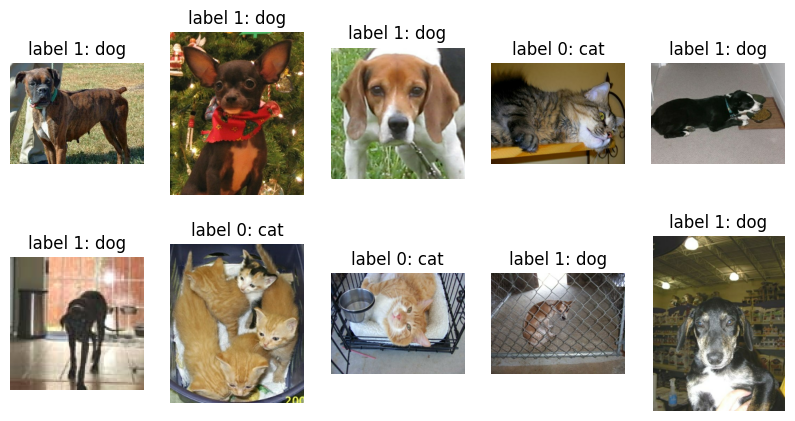

In [29]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [30]:
IMG_SIZE = 160 # 리사이징할 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [31]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


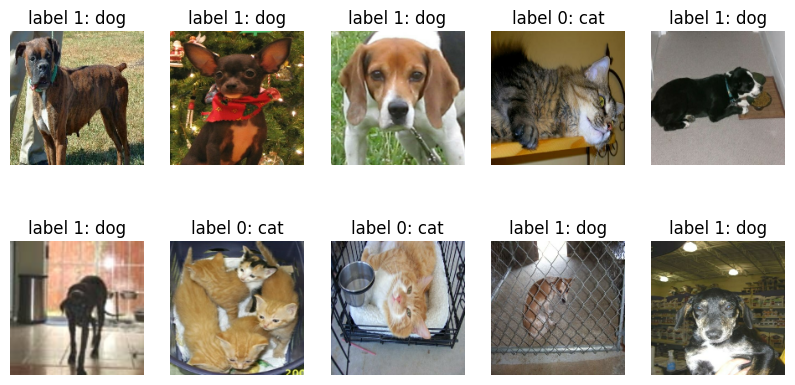

In [32]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [34]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

print("슝~")

슝~


In [35]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

print("슝~")

슝~


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 160, 160, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 80, 80, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 80, 80, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,132,322 (50.10 MB)

 Trainable params: 13,132,322 (50.10 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


슝~


한 스텝에 학습시킬 데이터의 개수인 BATCH_SIZE와 학습 데이터를 적절히 섞어줄 SHUFFLE_BUFFER_SIZE를 설정해주겠습니다.

In [38]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

BATCH_SIZE에 따라 32개의 데이터를 랜덤으로 뿌려줄 train_batches, validation_batches, test_batches를 만들어 주겠습니다.  
train_batches는 모델이 끊임없이 학습될 수 있도록 전체 데이터에서 32개를 랜덤으로 뽑아 계속 제공해 줄 것입니다.

In [39]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

train_batches에서 하나의 batch만 꺼내 데이터를 확인해볼까요?






In [40]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))

본격적으로 모델을 학습시켜보기 전에, 초기 모델의 성능은 어떤지 확인해 보겠습니다.   
validation(검증)을 하기 위한 데이터셋인 validation_batches를 이용해 20번의 예측을 해 보고, 평균 loss와 평균 accuracy를 확인해 보겠습니다.






In [41]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.4787 - loss: 0.6971
initial loss: 0.70
initial accuracy: 0.50


loss는 0.7이, accuracy는 약 50%가 나왔군요.

여기서 loss는 말 그대로 "손실"이라는 뜻으로, 얼마나 모델이 틀렸는지 나타냅니다. 따라서 loss는 낮을수록 좋은 것이죠. 또한 accuracy는 몇 퍼센트의 정확도를 보이느냐 에 대한 수치입니다. 우리는 강아지와 고양이를 분류하려고 하는데, 두 장 중 하나를 찍어도 50%는 나올 테니 지금 모델은 전혀 의미 없는 예측을 하는 것이라고 할 수 있습니다.

그러면 10 epoch를 학습시켜서 정확도가 어떻게 변하는지 확인해 보겠습니다. 아래 코드는 학습 환경에 따라 약 10~20분 내외가 걸릴 수 있습니다. (colab P100 GPU 기준 약 7분 내외)

In [ ]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
 34/582 ━━━━━━━━━━━━━━━━━━━━ 1:25 156ms/step - accuracy: 0.5094 - loss: 0.8155